(100, 4)
(100,)


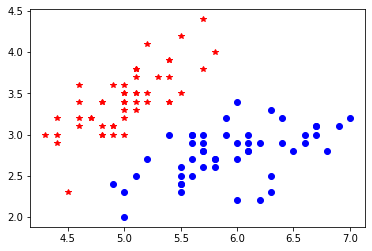

In [103]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
X = iris.data 
y = iris.target

Data = X[:100,:]
label = y[:100]
print(Data.shape)
print(label.shape)

# 数据四维，前两类线性可分，画一下前两维
plt.plot(Data[:50,0],Data[:50,1],'r*')
plt.plot(Data[50:,0],Data[50:,1],'bo')
plt.show()

In [104]:
# 划分训练集测试集，进行Perceptron的实验
X_train, X_test, y_train, y_test = train_test_split(
    Data, label, test_size=0.33, random_state=42)

In [113]:
y_train = (y_train-0.5)*2
y_test = (y_test-0.5)*2

In [107]:
# Your Code here 二分类，0和1,用了所有的特征数据
# init W
# y*w^T*x < 0

w = np.zeros([X_train.shape[-1], 1])
b = np.zeros([1])
result = (X_train.dot(w) + b).reshape(-1)
pred = 1*(result>0)
pred[pred==0]=-1

r = 0.05
t = 0
error = []
while np.sum(pred != y_train) and t<2000:
    # 取出判断错误的部分
    # w=w+r*y*x
    # b=b+r*x
    wrong_X = X_train[pred != y_train]
    wrong_y = y_train[pred != y_train]
    deltaw = wrong_X.T.dot(wrong_y).reshape(-1, 1)
    w = w + r * deltaw
    b = b + r * np.sum(wrong_y)
    result = (X_train.dot(w) + b).reshape(-1)
    pred = 1*(result>0)
    pred[pred==0]=-1
    t = t + 1
print("the number of iteration is %d" %t)


the number of iteration is 5


In [119]:
# test
result = (X_test.dot(w) + b).reshape(-1)
pred = 1*(result>0)
pred[pred==0]=-1
print('the accuracy in testing dataset:', np.sum(pred == y_test)/len(y_test) * 100, '%')

the accuracy in testing dataset: 100.0 %
